# Setup
[Project Description](https://docs.google.com/document/d/1U7U4PN39LvbMh9_PGCAjtJU7BS_omKqtc081Qqbcvlg/edit)

## imports

In [1]:
import cv2
import glob
import numpy as np
import sys
print(sys.version)
print("OpenCV version :  {0}".format(cv2.__version__))

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
OpenCV version :  3.4.2


In [2]:
import matplotlib.pyplot as plt
def plot_figures(figures, nrows=1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10,10))
    if(nrows > 1 or ncols > 1):
        for ind,title in enumerate(figures):
            axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
            axeslist.ravel()[ind].set_title(title)
            axeslist.ravel()[ind].set_axis_off()
        plt.tight_layout() # optional
    else:
        for ind,title in enumerate(figures):
            axeslist.imshow(figures[title], cmap=plt.gray())
            axeslist.set_title(title)
            axeslist.set_axis_off()


## Camera parameter matrices

In [3]:
left_intrinsic = np.array([[423.27381306, 0, 341.34626532],
                           [0, 421.27401756, 269.28542111],
                           [0, 0, 1]])

right_intrinsic = np.array([[420.91160482, 0, 352.16135589],
                            [0, 418.72245958, 264.50726699],
                            [0, 0, 1]])

distCoeffs_left = np.array([-0.43394157423038077, 0.26707717557547866,
                             -0.00031144347020293427, 0.0005638938101488364,
                             -0.10970452266148858])
distCoeffs_right = np.array([-0.4145817681176909, 0.19961273246897668,
                             -0.00014832091141656534, -0.0013686760437966467,
                             -0.05113584625015141])

# Step 1: Load the images

In [4]:
left_ = [cv2.imread(image) for image in sorted(glob.glob("../../images/task_6/left_*.png"))]
right_ = [cv2.imread(image) for image in sorted(glob.glob("../../images/task_6/right_*.png"))]

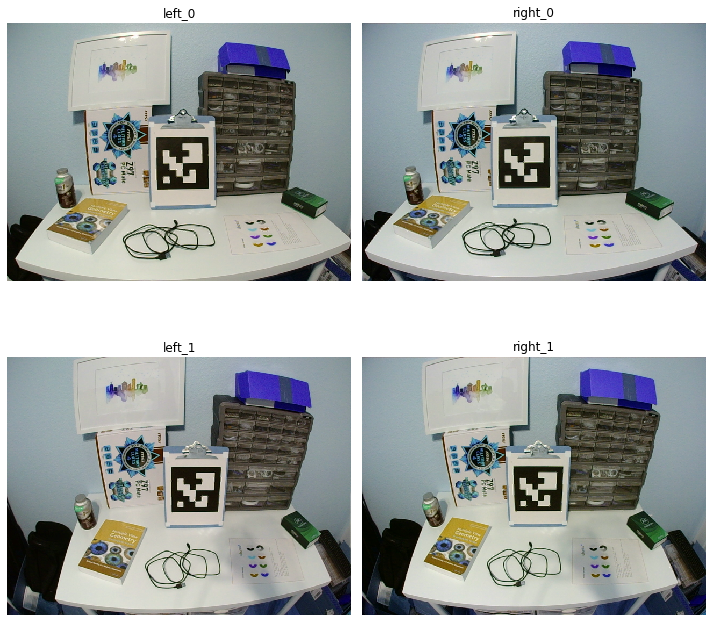

In [5]:
plot_figures({'left_0': left_[0], 'right_0': right_[0], 'left_1': left_[1], 'right_1': right_[1]}, 2, 2)

# Step 2: Detect ArUco markers

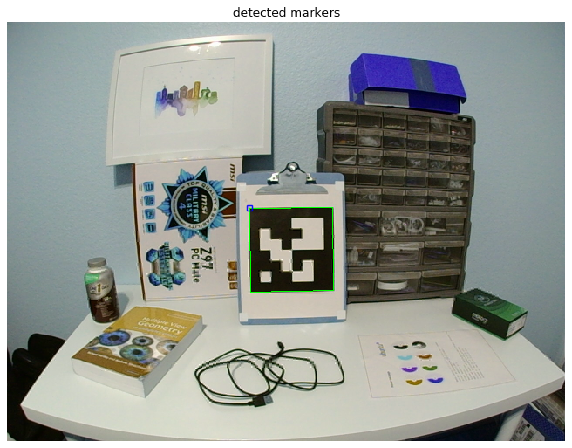

In [6]:
from cv2 import aruco

dic = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

markers = aruco.detectMarkers(left_[0],dic)

temp = aruco.drawDetectedMarkers(left_[0].copy(), markers[0])
plot_figures({'detected markers':temp}, 1,1)

# Step 3: Estimate Camera Pose
[solvePnP()](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#bool%20solvePnP(InputArray%20objectPoints,%20InputArray%20imagePoints,%20InputArray%20cameraMatrix,%20InputArray%20distCoeffs,%20OutputArray%20rvec,%20OutputArray%20tvec,%20bool%20useExtrinsicGuess,%20int%20flags))

In [7]:
objPoints = np.array([(0,0,0),(1,0,0),(1,1,0),(0,1,0)],dtype=np.float64)

In [8]:
markers[0][0][0]

array([[278., 213.],
       [373., 212.],
       [374., 307.],
       [279., 309.]], dtype=float32)

In [9]:
# rotation vector and translation vector of the camera relative to the objectPoints
retval, rot_vec, trans_vec = cv2.solvePnP(objPoints, markers[0][0][0], left_intrinsic, distCoeffs_left)
retval

True

In [10]:
rot_vec

array([[ 0.02648797],
       [-0.0994602 ],
       [-0.01370248]])

In [11]:
trans_vec

array([[-0.66050153],
       [-0.586764  ],
       [ 4.31125605]])

# Step 4: Check camera pose

In [12]:
%matplotlib inline

In [13]:
%matplotlib qt

In [15]:
from mpl_toolkits.mplot3d import Axes3D

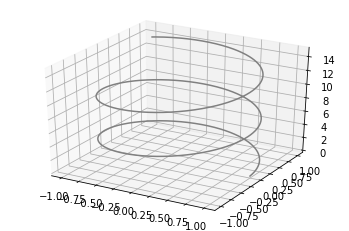

In [16]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

# z_points = 15 * np.random.random(100)
# x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
# y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
# ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

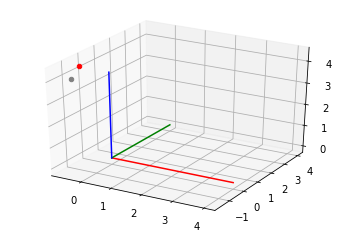

In [17]:
fig = plt.figure()
ax = plt.axes(projection="3d")

# x axis is red
x_line = np.linspace(0,4,100)
y_line = x_line*0
z_line = y_line
ax.plot3D(x_line, y_line, z_line,'red')

# y axis is green
y_line = np.linspace(0,4,100)
x_line = y_line*0
z_line = x_line
ax.plot3D(x_line, y_line, z_line,'green')

# z axis is blue
z_line = np.linspace(0,4,100)
y_line = z_line*0
x_line = y_line
ax.plot3D(x_line, y_line, z_line,'blue')


x_points = trans_vec[0]
y_points = trans_vec[1]
z_points = trans_vec[2]
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

rot_point = trans_vec+(rot_vec*10)
ax.scatter3D(rot_point[0], rot_point[1], rot_point[2], c='grey');


plt.show()

In [18]:
trans_vec+(rot_vec*10)

array([[-0.39562186],
       [-1.58136597],
       [ 4.17423126]])

### Output to png

In [ ]:
cv2.imwrite('../../output/task_2/left_1_right_1_rectified.png', out)
cv2.imwrite('../../output/task_2/left_1_right_1_rectified.png', out)